# 1.4.12 Template Matching

## Template Matching in OpenCV

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

In [5]:
resource_path = os.getcwd() + '/resource/'
img = cv2.imread(resource_path + 'tm02.png', 0)
img2 = img.copy()
template = cv2.imread(resource_path + 'template.png',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

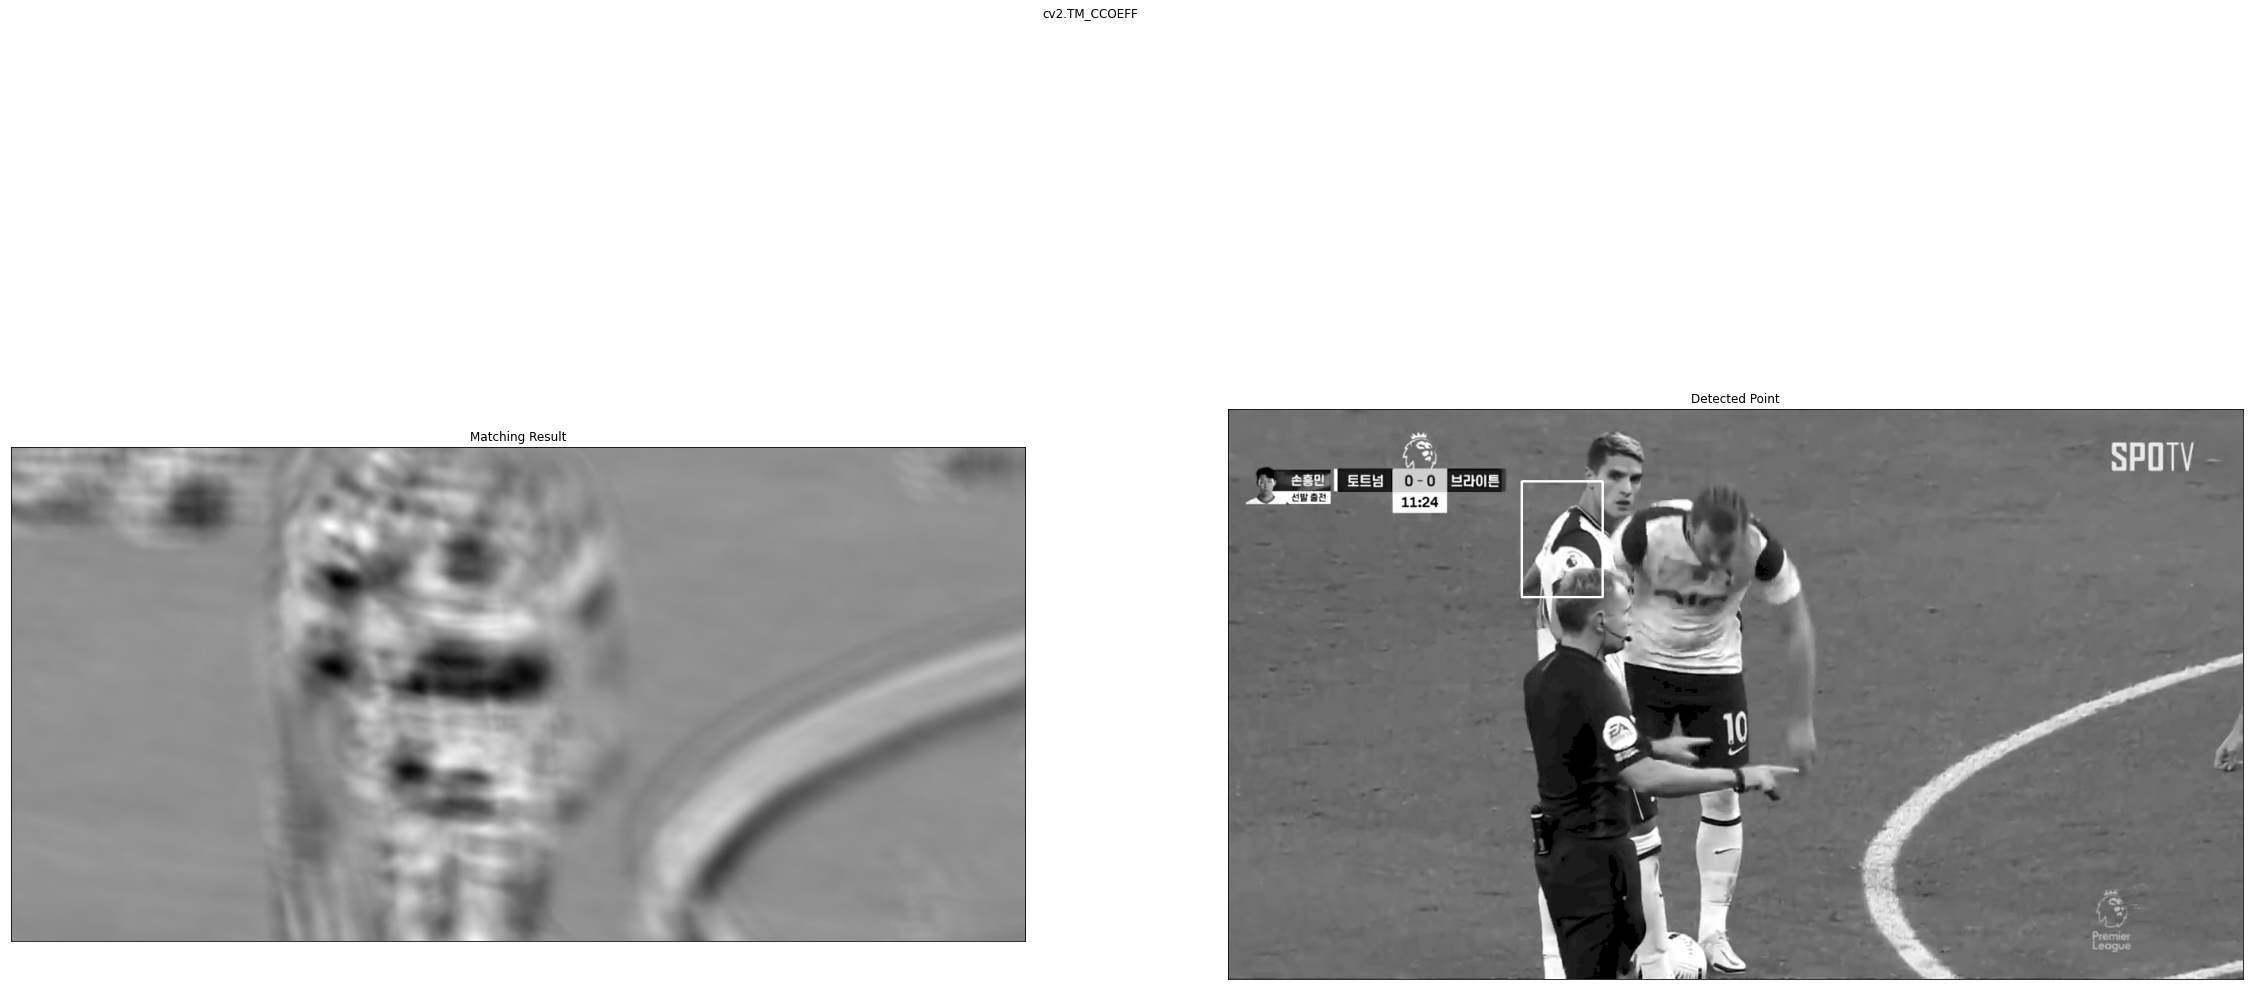

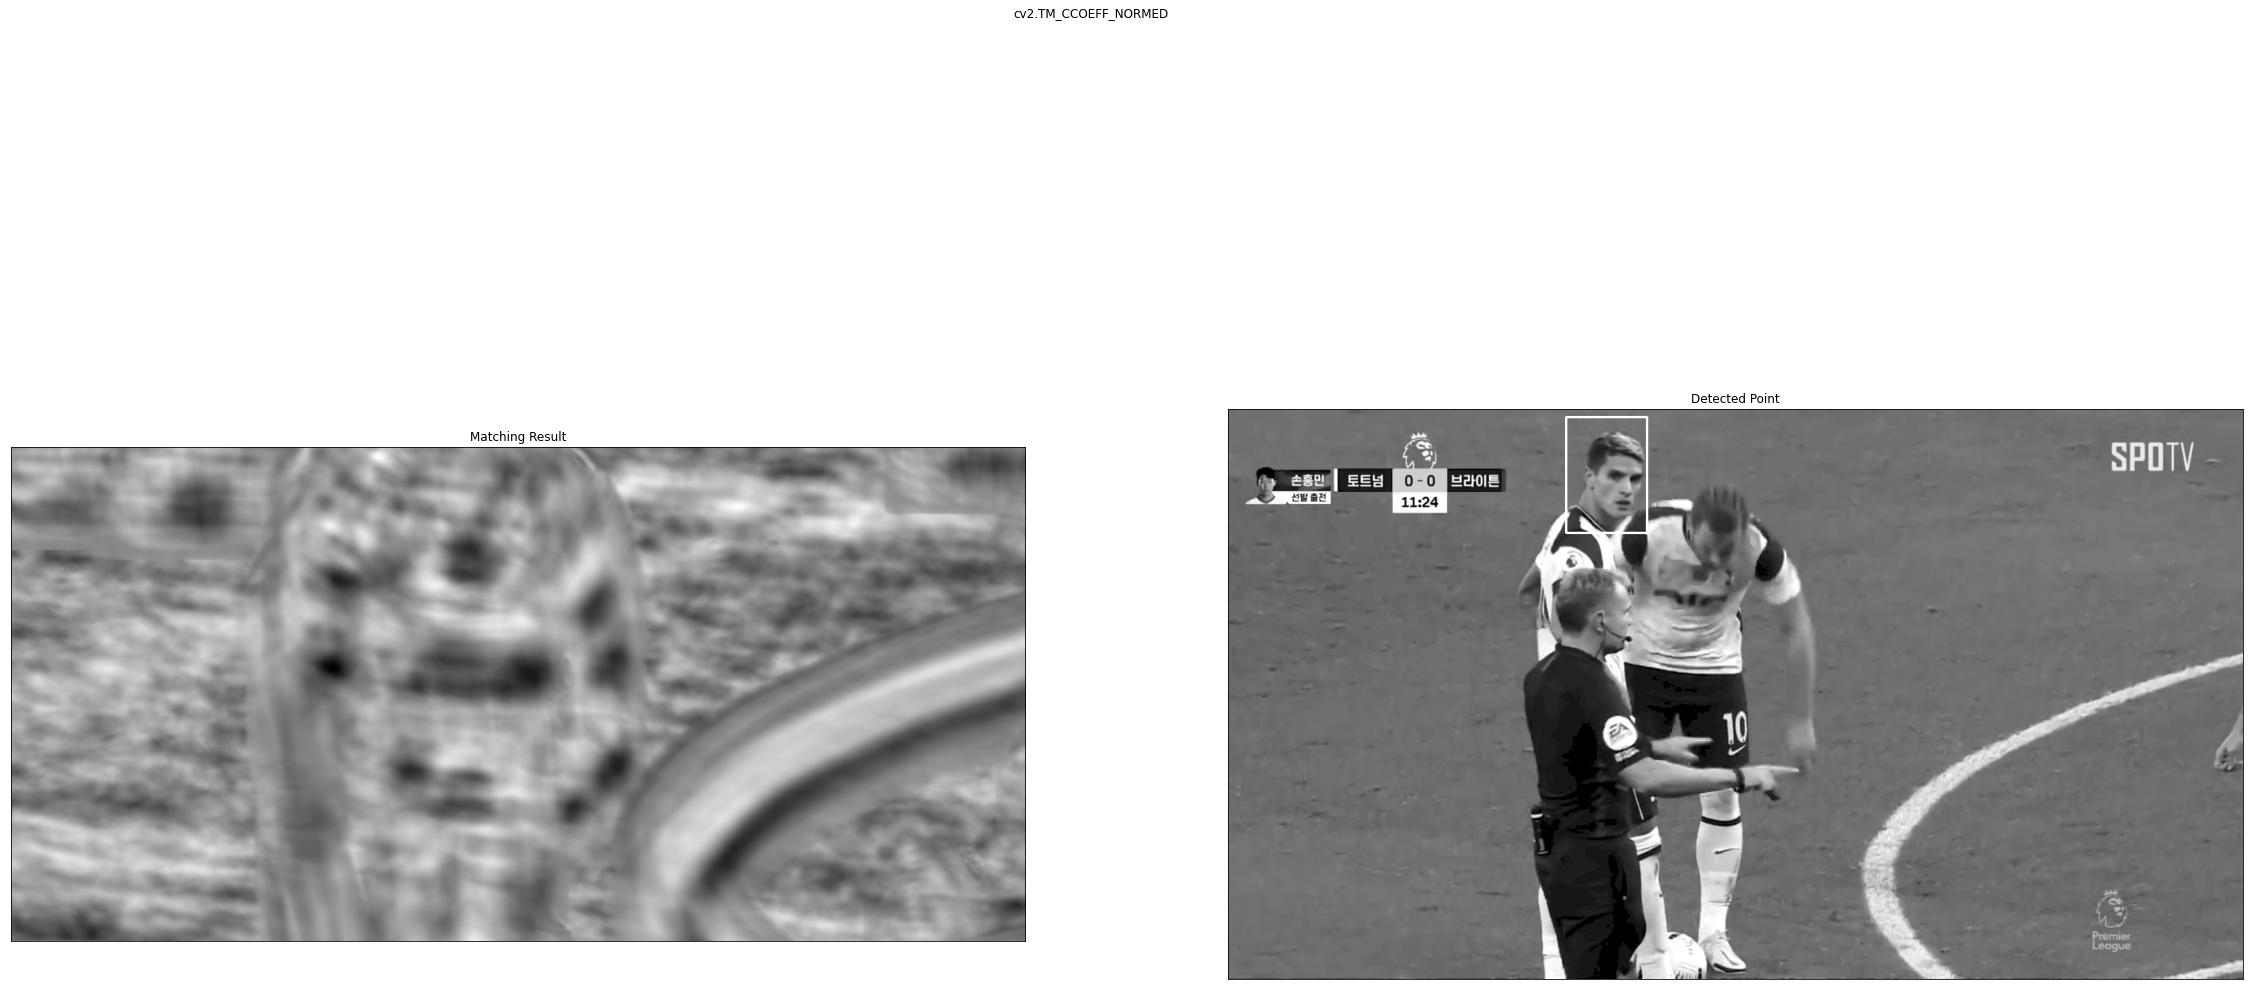

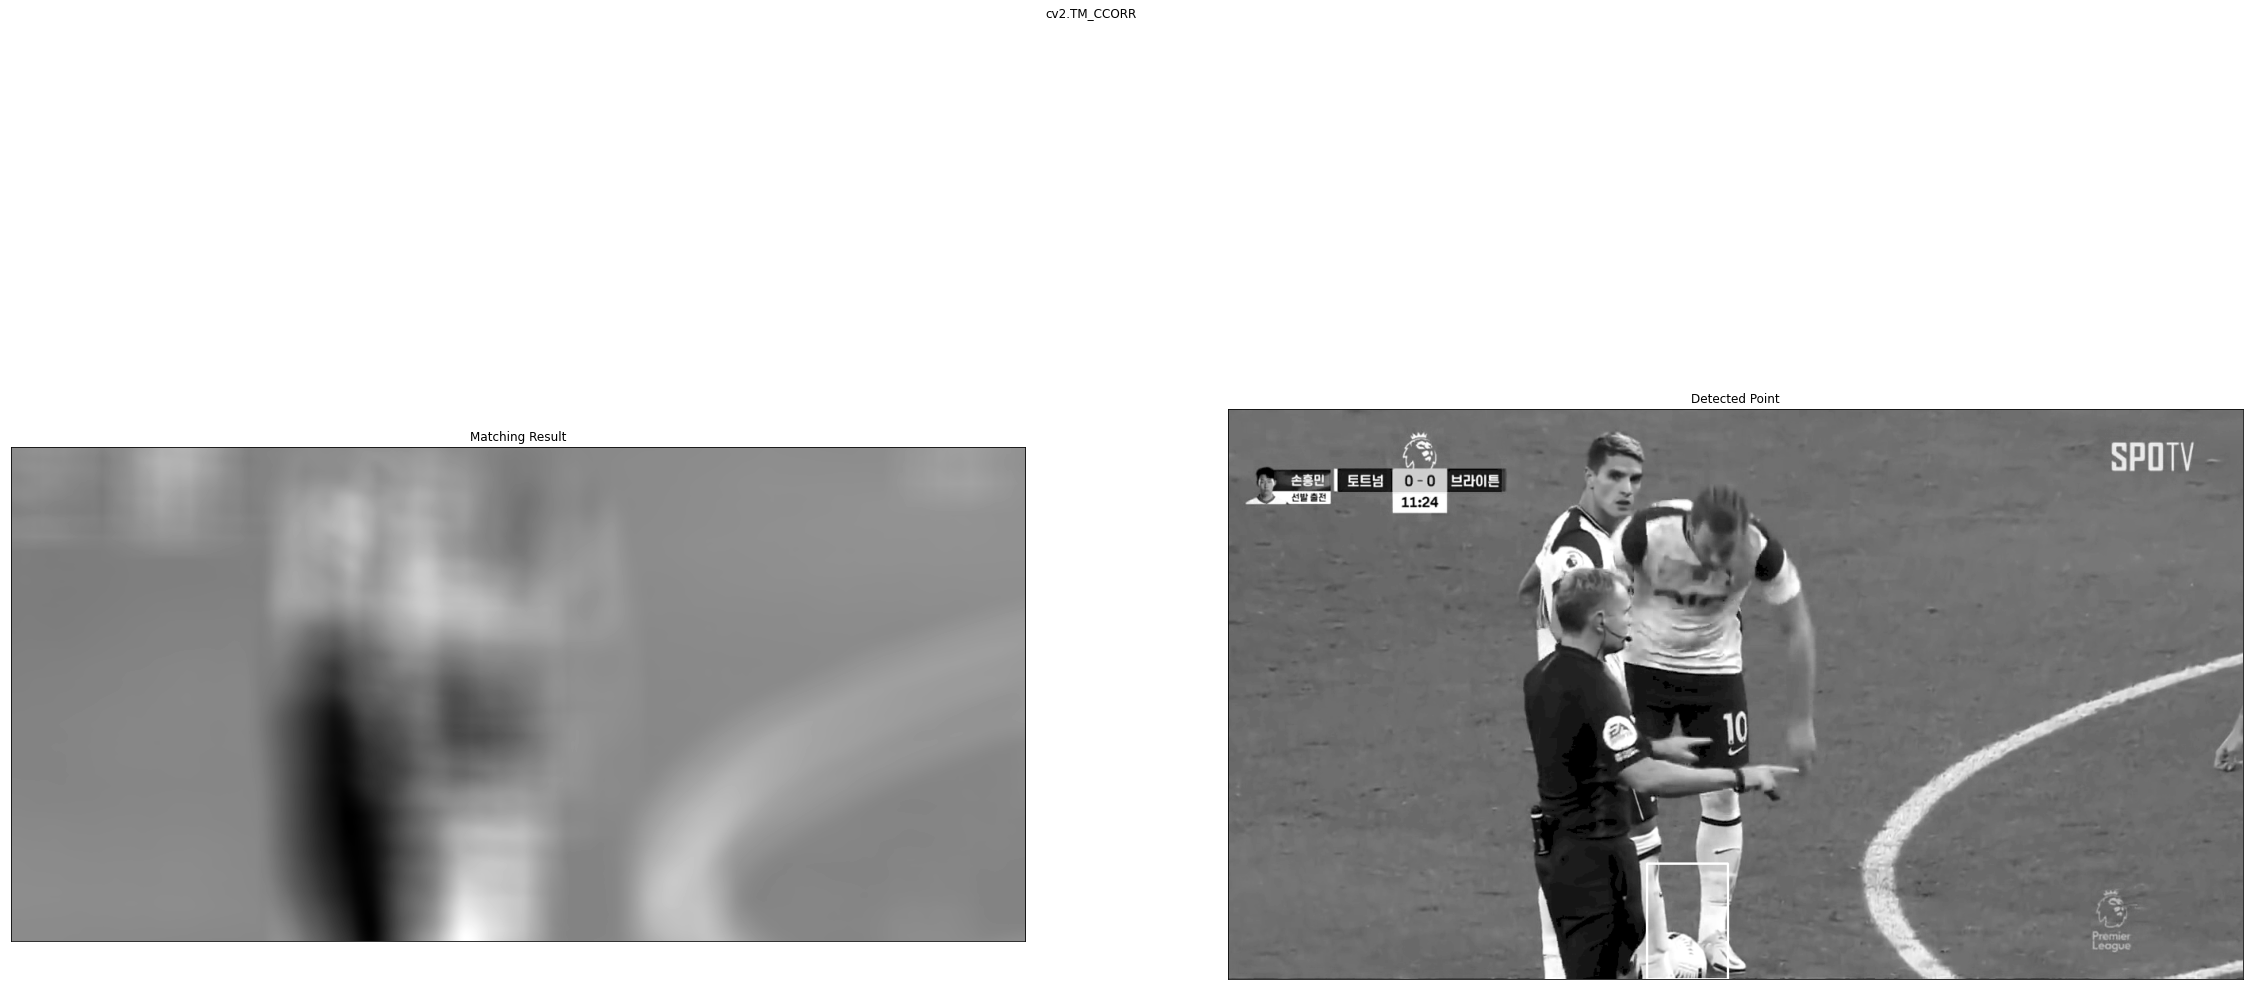

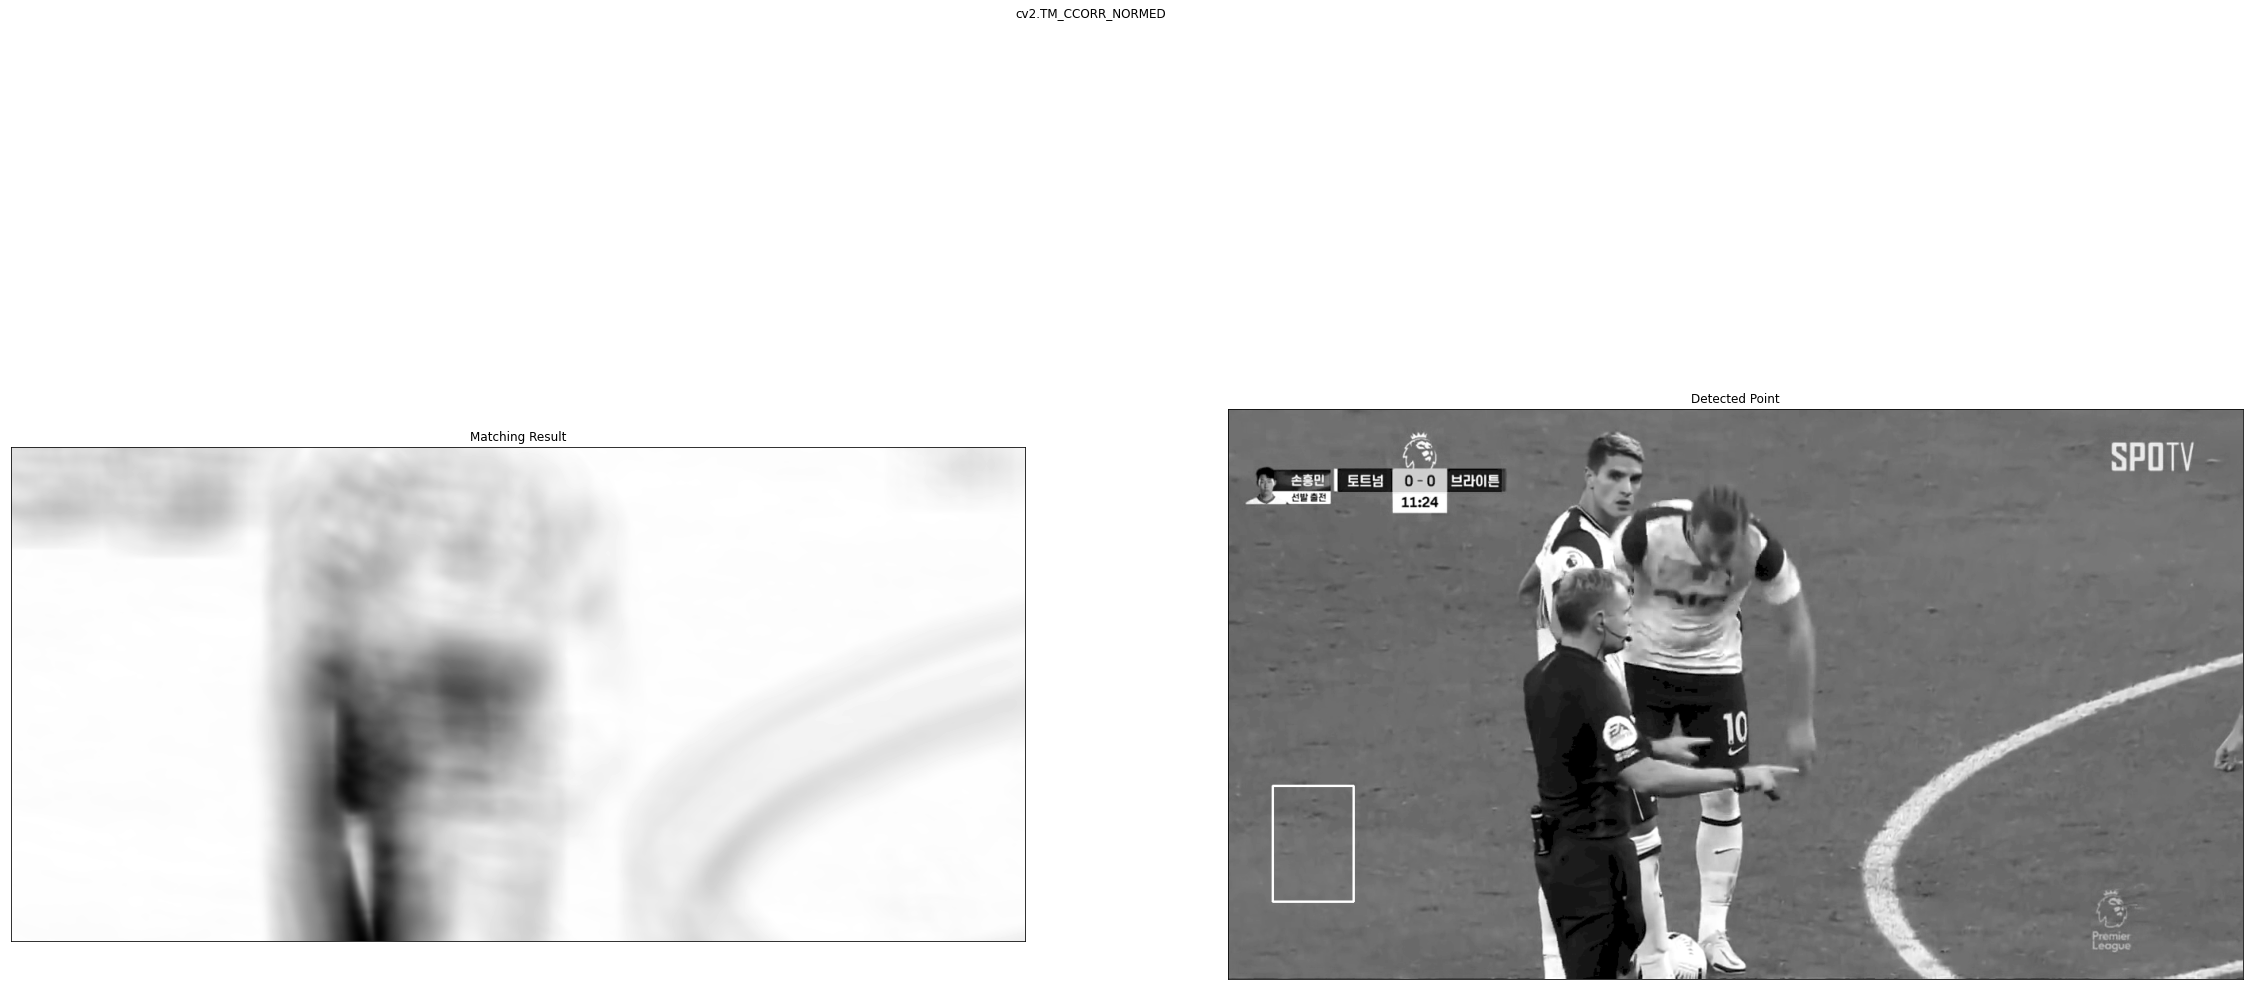

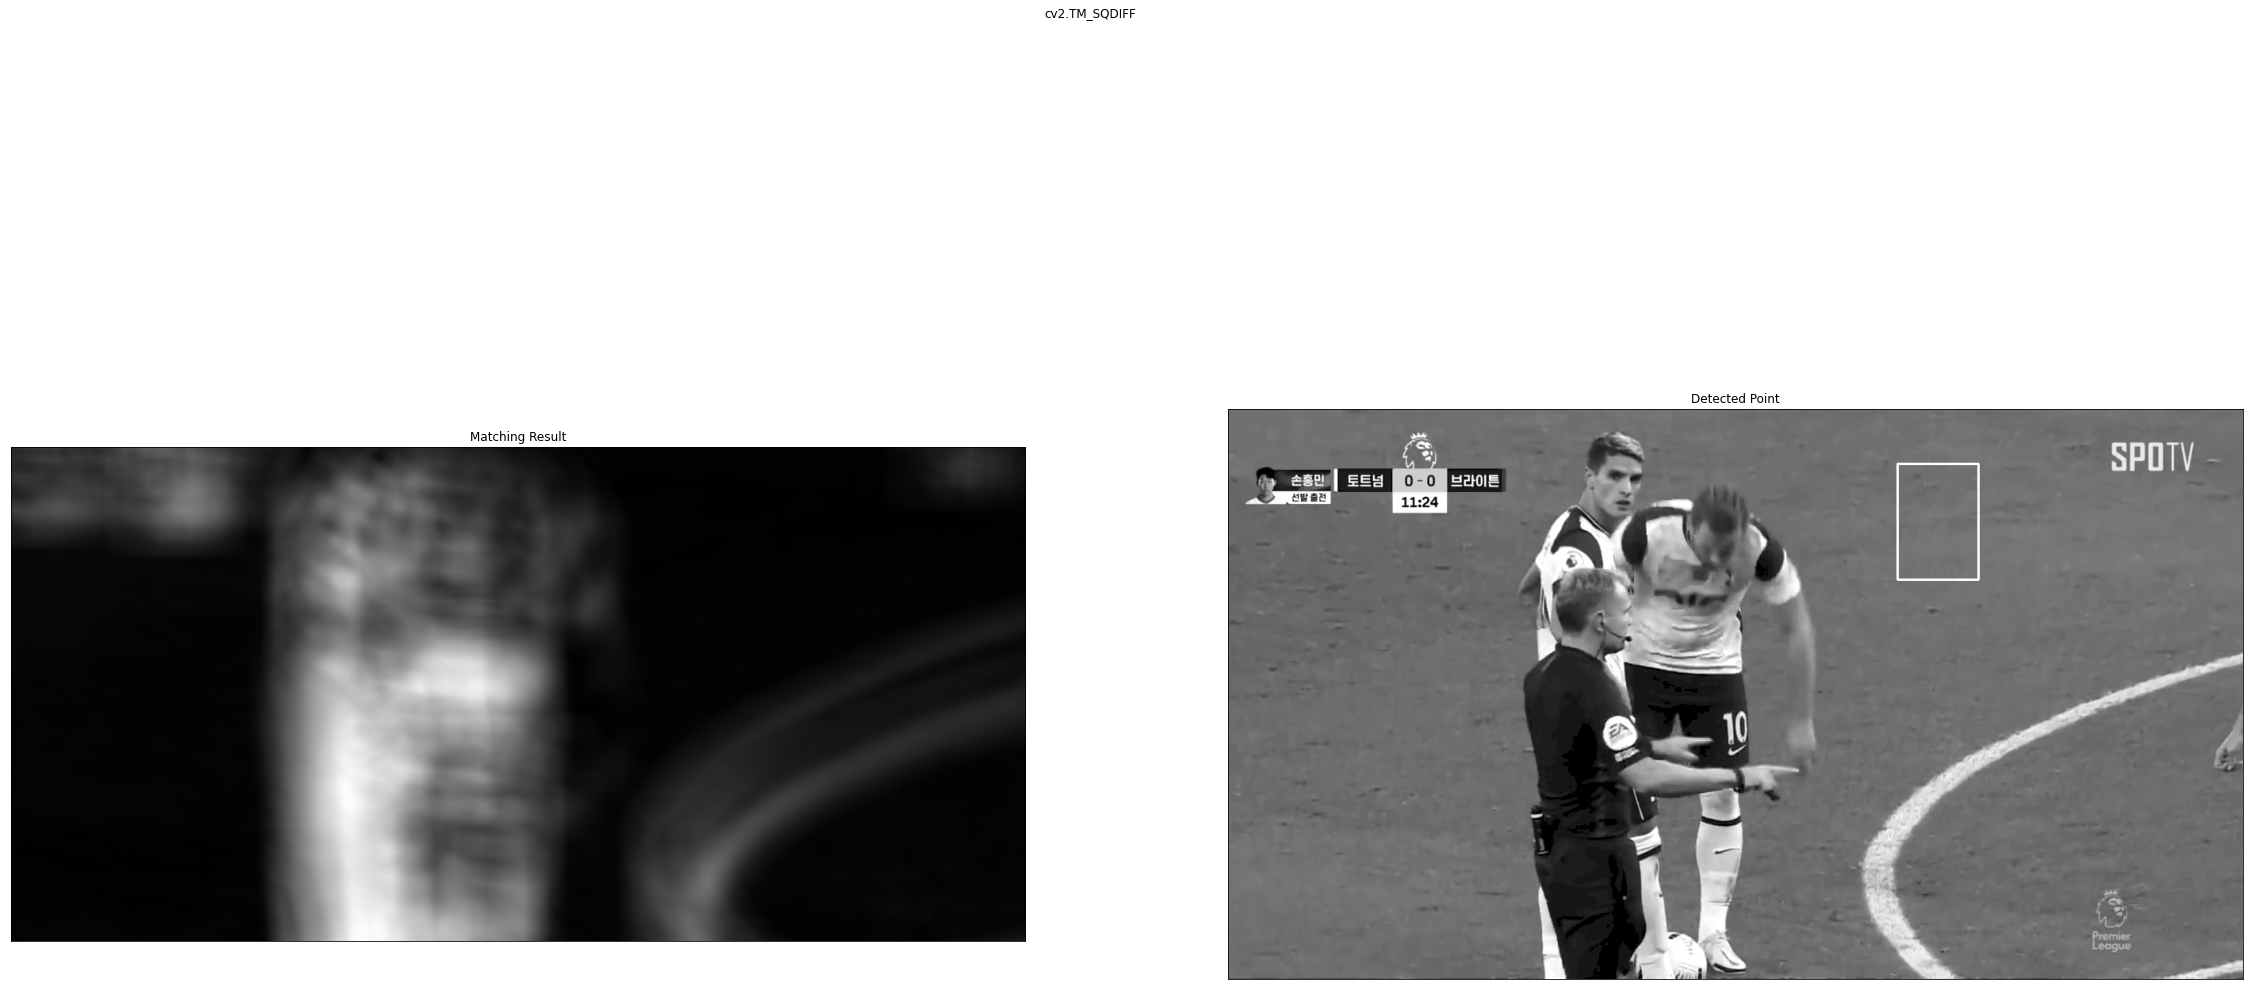

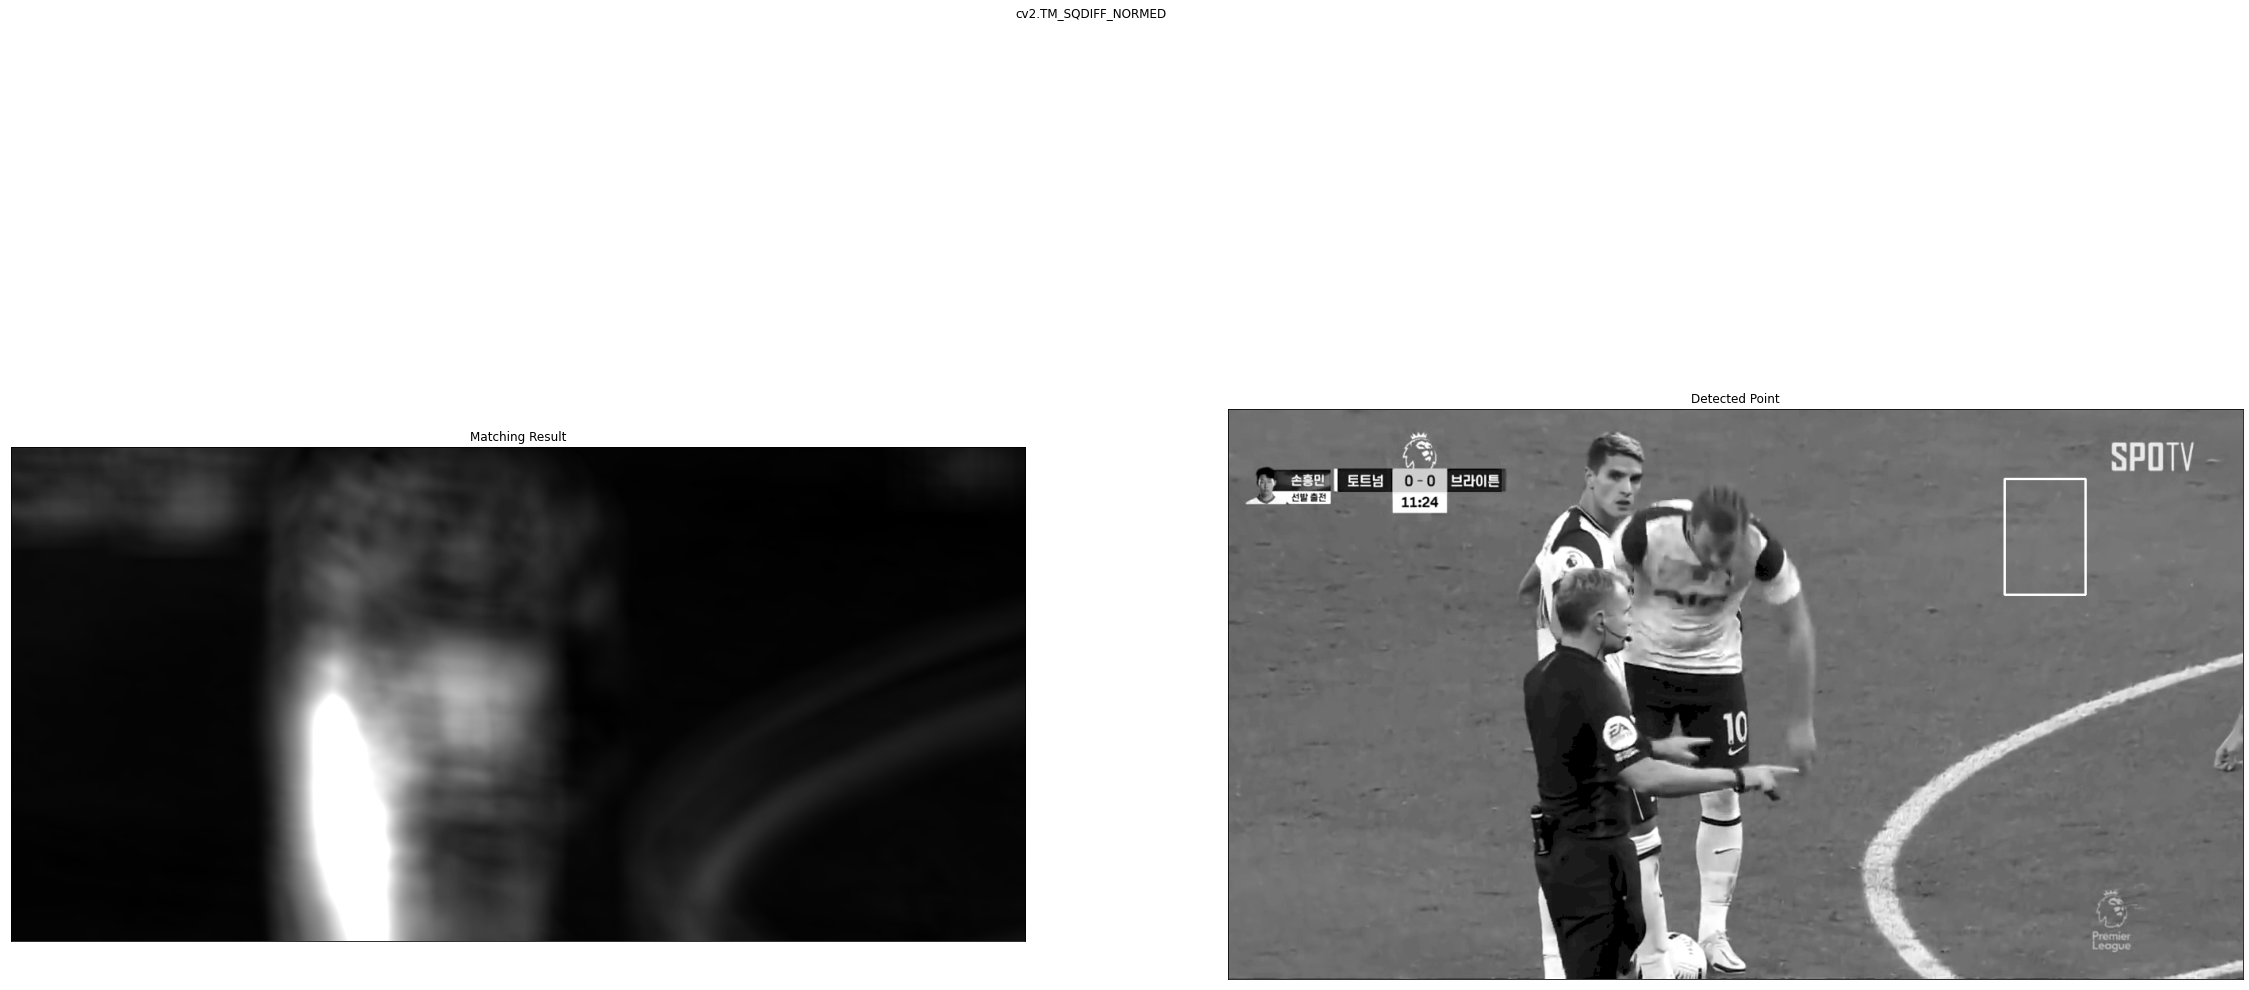

In [6]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    plt.figure(figsize=(40, 20))
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

## Template Matching with Multiple Objects

In [26]:
img_rgb = cv2.imread(resource_path + 'mario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
cv2.imshow('dst', img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
template = cv2.imread(resource_path + 'coin.png',0)
cv2.imshow('dst', template)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
w, h = template.shape[::-1]
print(w, h)

18 25


In [29]:
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)

In [30]:
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
threshold = 0.8
loc = np.where( res >= threshold)

In [33]:
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 4)
cv2.imshow('dst', img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
cv2.imwrite('res.png', img_rgb)

True